# <font color=red>Tutorial 11 - Classification Evaluation and Clustering (K-Means)</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('tableau-colorblind10')
sns.set_palette("viridis")

## Classification Evaluation Metrics

There are many classification metrics in the scikit-learn metrics package, let's examine some of them:

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

real_data    = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])
classifier_1 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1])
classifier_2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

We can use the `confusion_matrix()` method to create a confusion matrix:

In [3]:
cmtx = pd.DataFrame(
    confusion_matrix(real_data, classifier_1, labels=[0, 1]), 
    index=['real: 0', 'real: 1'], columns=['pred: 0', 'pred: 1']
)
cmtx

,pred: 0,pred: 1
real: 0,16,2
real: 1,1,1


In [4]:
cmtx = pd.DataFrame(
    confusion_matrix(real_data, classifier_2, labels=[0, 1]), 
    index=['real: 0', 'real: 1'], 
    columns=['pred: 0', 'pred: 1']
)
cmtx

,pred: 0,pred: 1
real: 0,15,3
real: 1,0,2


We can also get the accuracy, precision, and recall scores:

Accuracy - How many of my predictions are correct?

In [5]:
accuracy_score(real_data, classifier_1)

0.85

In [6]:
accuracy_score(real_data, classifier_2)

0.85

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg"></img>

Precision - How many retrieved items are relevant?

In [7]:
precision_score(real_data, classifier_1)

0.3333333333333333

In [8]:
precision_score(real_data, classifier_2)

0.4

Recall - How many relevant items are retreived?

In [9]:
recall_score(real_data, classifier_1)

0.5

In [10]:
recall_score(real_data, classifier_2)

1.0

F1 score is harmonic average of precision and recall

F1 score = $\dfrac{2*percision*recall}{percision + recall}$

In [11]:
f1_score(real_data, classifier_1)

0.4

In [12]:
f1_score(real_data, classifier_2)

0.5714285714285715

## The K-Means Algorithm

- K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups).
- The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K.
- The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. 

K-means works through the following iterative process:
1. Pick a value for K (the number of clusters to create).
2. Initialize K 'centroids' in your data.
3. Create the clusters - assign each point to the nearest centroid.
4. Make the clusters better - move each centroid to the center or its cluster.
5. Repeat steps 3-4 until the centroids converge.

We are going to use the Iris data-set. This data consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). It has four features from each sample: length and width of sepals and petals.

### Load Iris Data into Dataframe

In [13]:
from sklearn import datasets

iris_data = datasets.load_iris()
# print(iris_data['DESCR'])

# Create dataframe containing only the features
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['class'] = iris_data.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Visualize the data

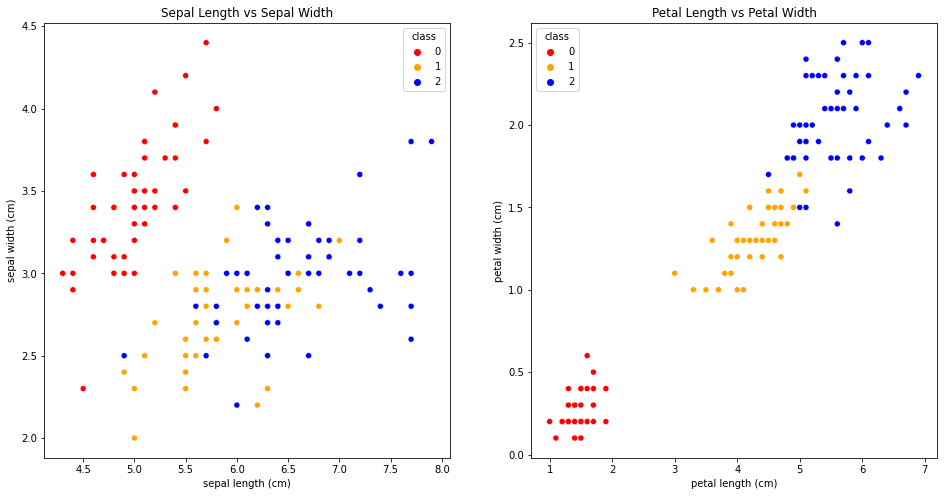

In [14]:
fig, axs = plt.subplots(1, 2)
colors = ['red', 'orange', 'blue'] # create color map, color for each iris type
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='class', palette=colors, ax=axs[0])
sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='class', palette=colors, ax=axs[1])
axs[0].set_title('Sepal Length vs Sepal Width')
axs[1].set_title('Petal Length vs Petal Width')
fig.set_size_inches(16, 8)

We can clearly see the grouping in the plots with the red dots, which correspond to species Setosa. The orange and blue dots are not so clearly separable.

## K-Means

We know that there are 3 labels, but in the next section we will ignore it and pretend we have a real clustering problem where we don't know the number of clusters. We'll use only the petal information for the clustering task to stay in 2D and to be able to visualize the results.

In [15]:
df_km = iris_df[['petal length (cm)', 'petal width (cm)']]
df_km.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


### Normalization

Min-max scaling is a common feature pre-processing technique which results in scaled data values that fall in the range [0,1]:

$\dfrac{x_i - min(X)}{max(X) - min(X)}$

In [16]:
from sklearn.preprocessing import MinMaxScaler

df_columns = df_km.columns
scaler = MinMaxScaler()
scaled_np_matrix = scaler.fit_transform(df_km)

km_scaled_df = pd.DataFrame(scaled_np_matrix, columns=df_columns)
km_scaled_df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


### The Elbow method

- The Elbow method gives us an idea on what a good number of clusters would be, based on the Sum of Squared Errors (SSE) - the sum of distances between data points and their assigned clusters’ centroids. 
- According to the elbow method we should pick the K at the spot where the SSE starts to flatten out and forming an elbow - from this point adding more clusters won't decrease the SSE significantly.

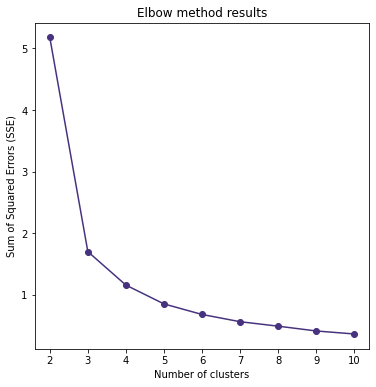

In [17]:
from sklearn.cluster import KMeans

sse = []
for k in range(2, 11):
    km = KMeans(n_clusters=k) # Initialize K-Means model with k centroids
    km.fit(km_scaled_df) # Run algorithm and create clusters
    sse.append(km.inertia_) # SSE calculated is provided in the KMeans object, it calculates SSE automatically, 
                            # and given in the inertia_ attribute    
plt.figure(figsize=(6,6))
plt.plot(range(2, 11), sse, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow method results');

We can notice that from the point of k=3 the SSE starts to flatten and form an elbow, so that will be our number of clusters input for the K-means algorithm

### Run & Evaluate K-Means

Initialize the KMeans object:

In [18]:
km = KMeans(n_clusters=3)

Run KMeans algorithm on the `df_km` data:

In [19]:
km.fit(km_scaled_df)

KMeans(n_clusters=3)

We can access the clusters centers using the `cluster_centers_` attribute:

In [20]:
km.cluster_centers_

array([[0.7740113 , 0.81510417],
       [0.07830508, 0.06083333],
       [0.55867014, 0.51041667]])

We can access the predicted labels using the `labels_` attribute:

In [21]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Visualize the results

[Text(0.5, 0, 'Length (cm)'),
 Text(0, 0.5, 'Width (cm)'),
 Text(0.5, 1.0, 'Original labels')]

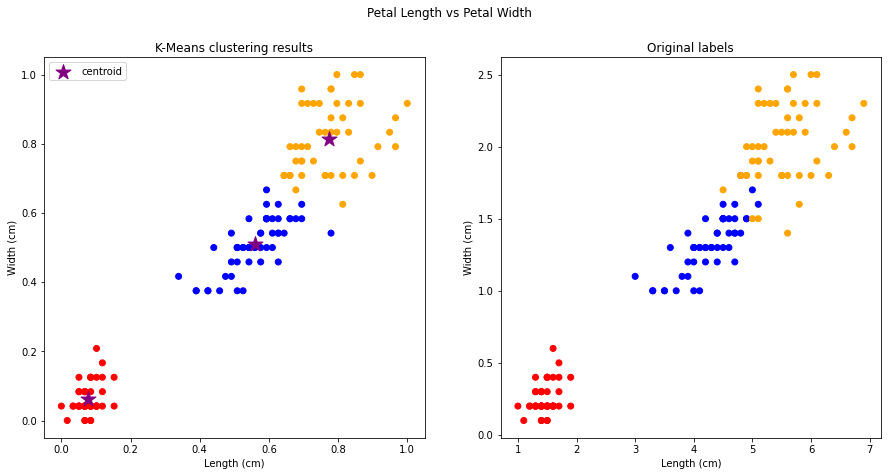

In [36]:
colors = np.array(['red', 'blue', 'orange'])

# technical change to match the colors below
map_dict = {0:2,1:0,2:1} 
labels = np.array([map_dict[l] for l in km.labels_])

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(15, 7)
fig.suptitle('Petal Length vs Petal Width')
axs[0].scatter(km_scaled_df['petal length (cm)'], km_scaled_df['petal width (cm)'], c= colors[labels])
axs[0].scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple', marker='*',s=250, label='centroid')
axs[0].set(xlabel='Length (cm)', ylabel='Width (cm)', title='K-Means clustering results')
axs[0].legend()
axs[1].scatter(df_km['petal length (cm)'], df_km['petal width (cm)'], c= colors[iris_data.target])
axs[1].set(xlabel='Length (cm)', ylabel='Width (cm)', title='Original labels')

Can you drae lines that separate between the clusters?

## <font color=blue>**Exercise**</font>

Run the K-means algorithm on the sepal data (length and width). Use the elbow method to choose the number of clusters (K). Present visualization of the K-means clustering results and compare it to the ground true

In [ ]:
# write your code here


## <font color=blue>**Solution**</font>

In [37]:
df_km = iris_df[['sepal length (cm)', 'sepal width (cm)']]
df_km.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


### Normalization

In [38]:
df_columns = df_km.columns
scaler = MinMaxScaler()
scaled_np_matrix = scaler.fit_transform(df_km)

km_scaled_df = pd.DataFrame(scaled_np_matrix, columns=df_columns)
km_scaled_df.head()

,sepal length (cm),sepal width (cm)
0,0.222222,0.625000
1,0.166667,0.416667
2,0.111111,0.500000
3,0.083333,0.458333
4,0.194444,0.666667


### Find K using the Elbow method

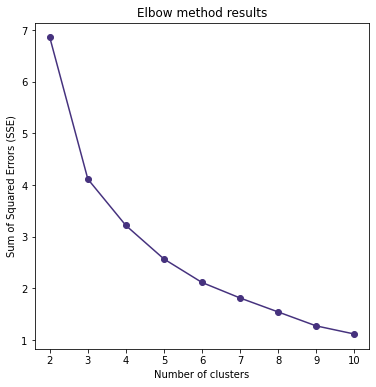

In [39]:
from sklearn.cluster import KMeans

sse = []
for k in range(2, 11):
    km = KMeans(n_clusters=k) # Initialize K-Means model with k centroids
    km.fit(km_scaled_df) # Run algorithm and create clusters
    sse.append(km.inertia_) # SSE calculated is provided in the KMeans object, it calculates SSE automatically, 
                            # and given in the inertia_ attribute    
plt.figure(figsize=(6,6))
plt.plot(range(2, 11), sse, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow method results');

### Run & Evaluate K-Means

In [44]:
km = KMeans(n_clusters=3)
km.fit(km_scaled_df)

KMeans(n_clusters=3)

In [45]:
km.cluster_centers_

array([[0.40483539, 0.28009259],
       [0.19897959, 0.60459184],
       [0.69562648, 0.45390071]])

In [46]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### Visualize the results

In [51]:
km.labels_[:3],iris_data.target[:3]

(array([1, 1, 1]), array([0, 0, 0]))

[Text(0.5, 0, 'Length (cm)'),
 Text(0, 0.5, 'Width (cm)'),
 Text(0.5, 1.0, 'Original labels')]

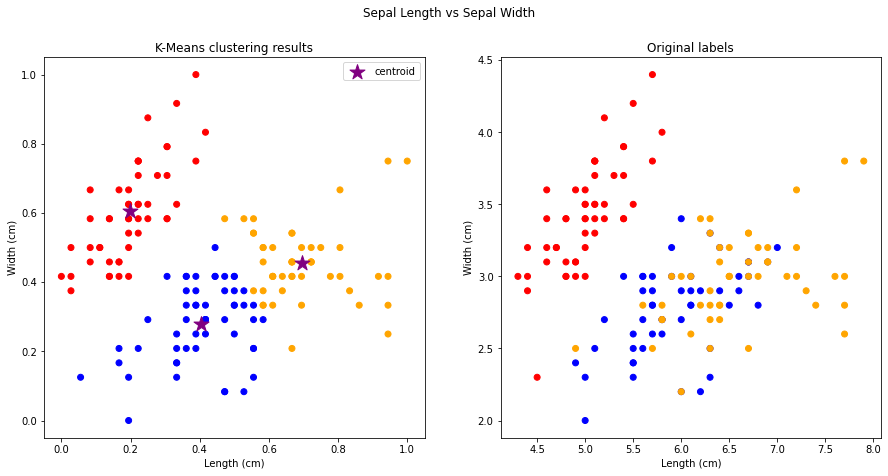

In [56]:
colors = np.array(['red', 'blue', 'orange'])

# technical change to match the colors below
map_dict = {0:1,1:0,2:2} 
labels = np.array([map_dict[l] for l in km.labels_])

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(15, 7)
fig.suptitle('Sepal Length vs Sepal Width')
axs[0].scatter(km_scaled_df['sepal length (cm)'], km_scaled_df['sepal width (cm)'], c= colors[labels])
axs[0].scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple', marker='*',s=250, label='centroid')
axs[0].set(xlabel='Length (cm)', ylabel='Width (cm)', title='K-Means clustering results')
axs[0].legend()
axs[1].scatter(df_km['sepal length (cm)'], df_km['sepal width (cm)'], c= colors[iris_data.target])
axs[1].set(xlabel='Length (cm)', ylabel='Width (cm)', title='Original labels')